In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
wine_qulatiy_df=pd.read_csv('WineQT.csv')
wine_qulatiy_df.drop(columns=['Id'],inplace=True)



In [3]:
X=wine_qulatiy_df.iloc[:,:-1].values
y=wine_qulatiy_df.iloc[:,-1].values

scaler=StandardScaler()
scaler.fit(X)
n_neighbors=int(np.sqrt(len(X)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
KNeighbors=KNeighborsClassifier(n_neighbors=n_neighbors)
KNeighbors.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=33)

In [4]:
predicted_result=KNeighbors.predict(X_test)
comparsiion_df=pd.DataFrame({'actual_value':y_test,'predicted_result':predicted_result})


In [5]:
cf_matrix_result=confusion_matrix(y_test,predicted_result)
cf_matrix_result

array([[  0,   5,   4,   0,   0],
       [  0, 105,  38,   0,   0],
       [  0,  63,  79,   4,   0],
       [  0,  14,  24,   3,   0],
       [  0,   0,   4,   0,   0]])

<Axes: >

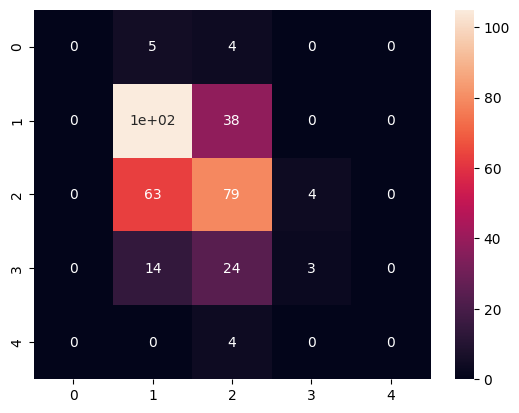

In [6]:
sns.heatmap(cf_matrix_result ,annot=True)

<Axes: xlabel='k_value', ylabel='accuracy'>

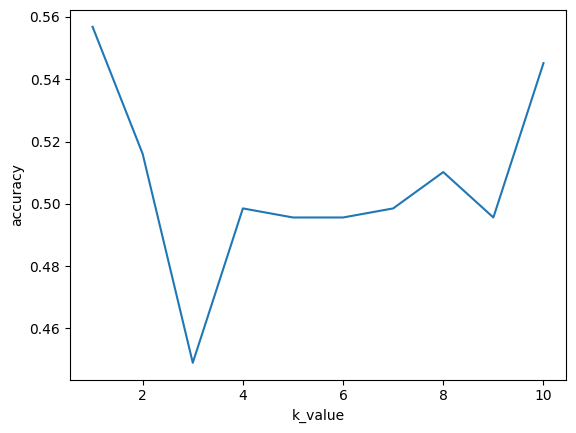

In [12]:
a=[]
for i in range(1,11):
    KNeighbors=KNeighborsClassifier(n_neighbors=i)
    KNeighbors.fit(X_train,y_train)
    predicted_result=KNeighbors.predict(X_test)
    accuracy_score(y_test, predicted_result)
    a.append(accuracy_score(y_test, predicted_result))
a 
accuracy_df=pd.DataFrame({'k_value':np.arange(1,11),'accuracy':a })
sns.lineplot(data=accuracy_df,x='k_value',y='accuracy')

In [14]:
classifications_re=classification_report(y_test, predicted_result)
print(classifications_re)

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.56      0.76      0.64       143
           6       0.54      0.49      0.51       146
           7       0.43      0.15      0.22        41
           8       0.00      0.00      0.00         4

    accuracy                           0.55       343
   macro avg       0.30      0.28      0.28       343
weighted avg       0.51      0.55      0.51       343



/home/om/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/om/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/om/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Assignment 2: KNN Classification on the Titanic Dataset
# Question:
# • In this assignment, you will use the Titanic dataset to predict whether a passenger
# survived the sinking of the Titanic based on various features. Complete the
# following tasks:
# • Download the Titanic dataset from the link provided below.
# • Preprocess the data:
# o Handle any missing values, especially in the Age and Embarked columns.
# o Convert categorical variables (e.g., Sex, Embarked) into numerical values
# using one-hot encoding.
# o Standardize the features using StandardScaler.
# • Split the data into training and testing sets (70% training, 30% testing).
# • Build a KNN classifier with k=5 and train it on the training data.
# • Evaluate the model's performance on the test data using accuracy, confusion
# matrix, and classification report.
# • Test the model by predicting the survival outcome for a new passenger with the
# following features:
# o Pclass = 1 (First class)
# o Sex = 'female'
# o Age = 29
# o SibSp = 0 (No siblings/spouses aboard)
# o Parch = 0 (No parents/children aboard)
# o Fare = 50
# o Embarked = 'C' (Cherbourg)
# • Experiment with different values of k (from 1 to 15) and plot the test accuracy for
# each value.
# Expected Output:
# • Accuracy, confusion matrix, and classification report for the model.
# • Predicted survival outcome for the new passenger.
# • A plot showing the accuracy vs. different values of k

In [15]:
accuracy_df

,k_value,accuracy
0,1,0.556851
1,2,0.516035
2,3,0.448980
3,4,0.498542
4,5,0.495627
5,6,0.495627
6,7,0.498542
7,8,0.510204
8,9,0.495627
9,10,0.545190
